In [1]:
#importing the useful libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading the Data Set
train_df=pd.read_csv("C:\\Users\\SHAIKH MD KASHIF\\Downloads\\data_and_questions\\data\\train.csv")
train_df.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


In [3]:
test_df=pd.read_csv("C:\\Users\\SHAIKH MD KASHIF\\Downloads\\data_and_questions\\data\\test.csv")
test_df.head()

,review
0,"""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc..."


In [4]:
data_df=pd.concat([train_df,test_df],ignore_index=True)
data_df.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


# Exploring the Dataset

In [5]:
train_df.shape

(161296, 4)

In [6]:
test_df.shape

(1998, 1)

In [7]:
data_df.columns

Index(['uniqueID', 'drugName', 'condition', 'review'], dtype='object')

In [8]:
data_df.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


In [9]:
data_df.shape

(163294, 4)

In [10]:
data_df["drugName"].value_counts().head(6)

Etonogestrel                          48
Levonorgestrel                        43
Ethinyl estradiol / norethindrone     30
Ethinyl estradiol / norgestimate      26
Ethinyl estradiol / levonorgestrel    26
Nexplanon                             25
Name: drugName, dtype: int64

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163294 entries, 0 to 163293
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uniqueID   1993 non-null   float64
 1   drugName   1999 non-null   object 
 2   condition  1988 non-null   object 
 3   review     3989 non-null   object 
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [12]:
data_df.isnull().sum()

uniqueID     161301
drugName     161295
condition    161306
review       159305
dtype: int64

In [13]:
# Here the above we have more than 50% of data is missing so we have to go ffor dropping the data 
data_df=data_df.dropna().reset_index(drop=True)

In [14]:
data_df.describe()

,uniqueID
count,1975.000000
mean,117009.844051
std,68103.023967
min,28.000000
25%,56544.000000
50%,118541.000000
75%,176258.000000
max,232277.000000


# Data Visualization

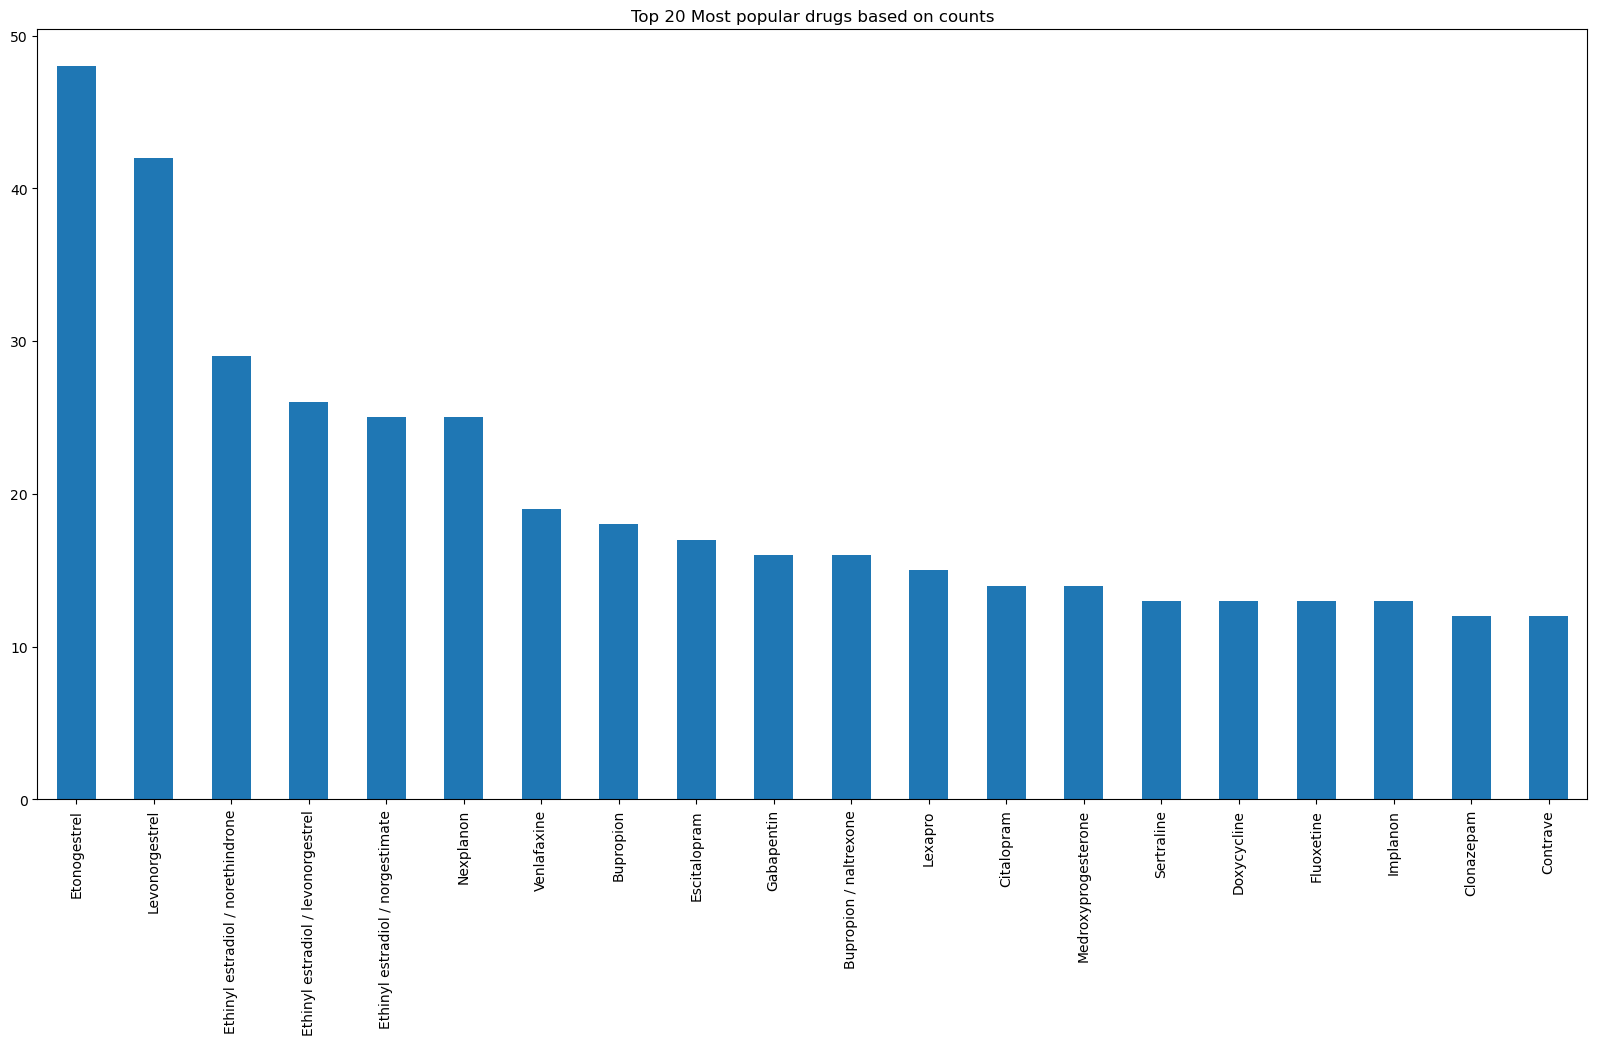

In [15]:
plt.figure(figsize=(20,10))
data_df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [16]:
data_df.count()

uniqueID     1975
drugName     1975
condition    1975
review       1975
dtype: int64

In [17]:
data_df.isnull().sum()

uniqueID     0
drugName     0
condition    0
review       0
dtype: int64

In [18]:
data_df['drugName'].value_counts().nsmallest(20)

MetroGel-Vaginal                        1
Phenazopyridine                         1
Xulane                                  1
Kadian                                  1
Firmagon                                1
Elavil                                  1
Savella                                 1
Endocet                                 1
Flecainide                              1
Tri-Lo-Sprintec                         1
Unisom SleepGels                        1
Oxazepam                                1
Guaifenesin / phenylephrine             1
Kombiglyze XR                           1
Enbrel                                  1
Stelara                                 1
Dexbrompheniramine / pseudoephedrine    1
Promethazine                            1
Fentanyl Transdermal System             1
Brexpiprazole                           1
Name: drugName, dtype: int64

<AxesSubplot:>

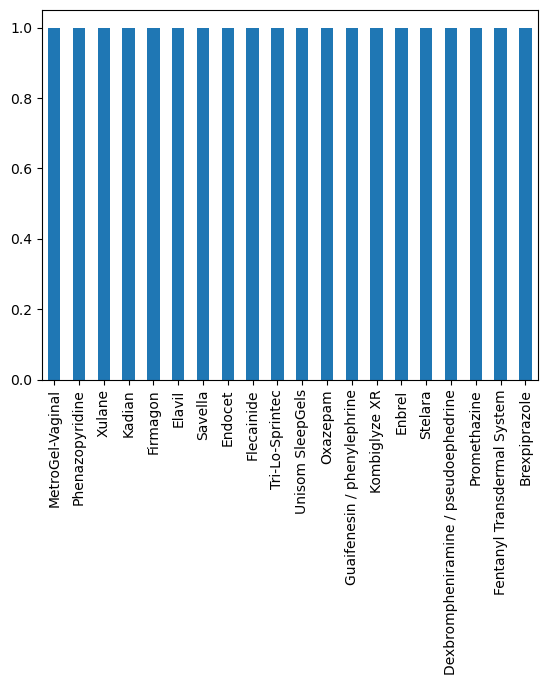

In [19]:
data_df['drugName'].value_counts().nsmallest(20).plot(kind='bar')

In [20]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [21]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            print(True)
            print(drug_suffix[i])

In [22]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [23]:
data_categories = pd.DataFrame(data_df['drugName'])

In [24]:
data_categories['drug_categories']=data_df['drugName'].apply(classify_drug)

In [25]:
data_categories.head()

,drugName,drug_categories
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None


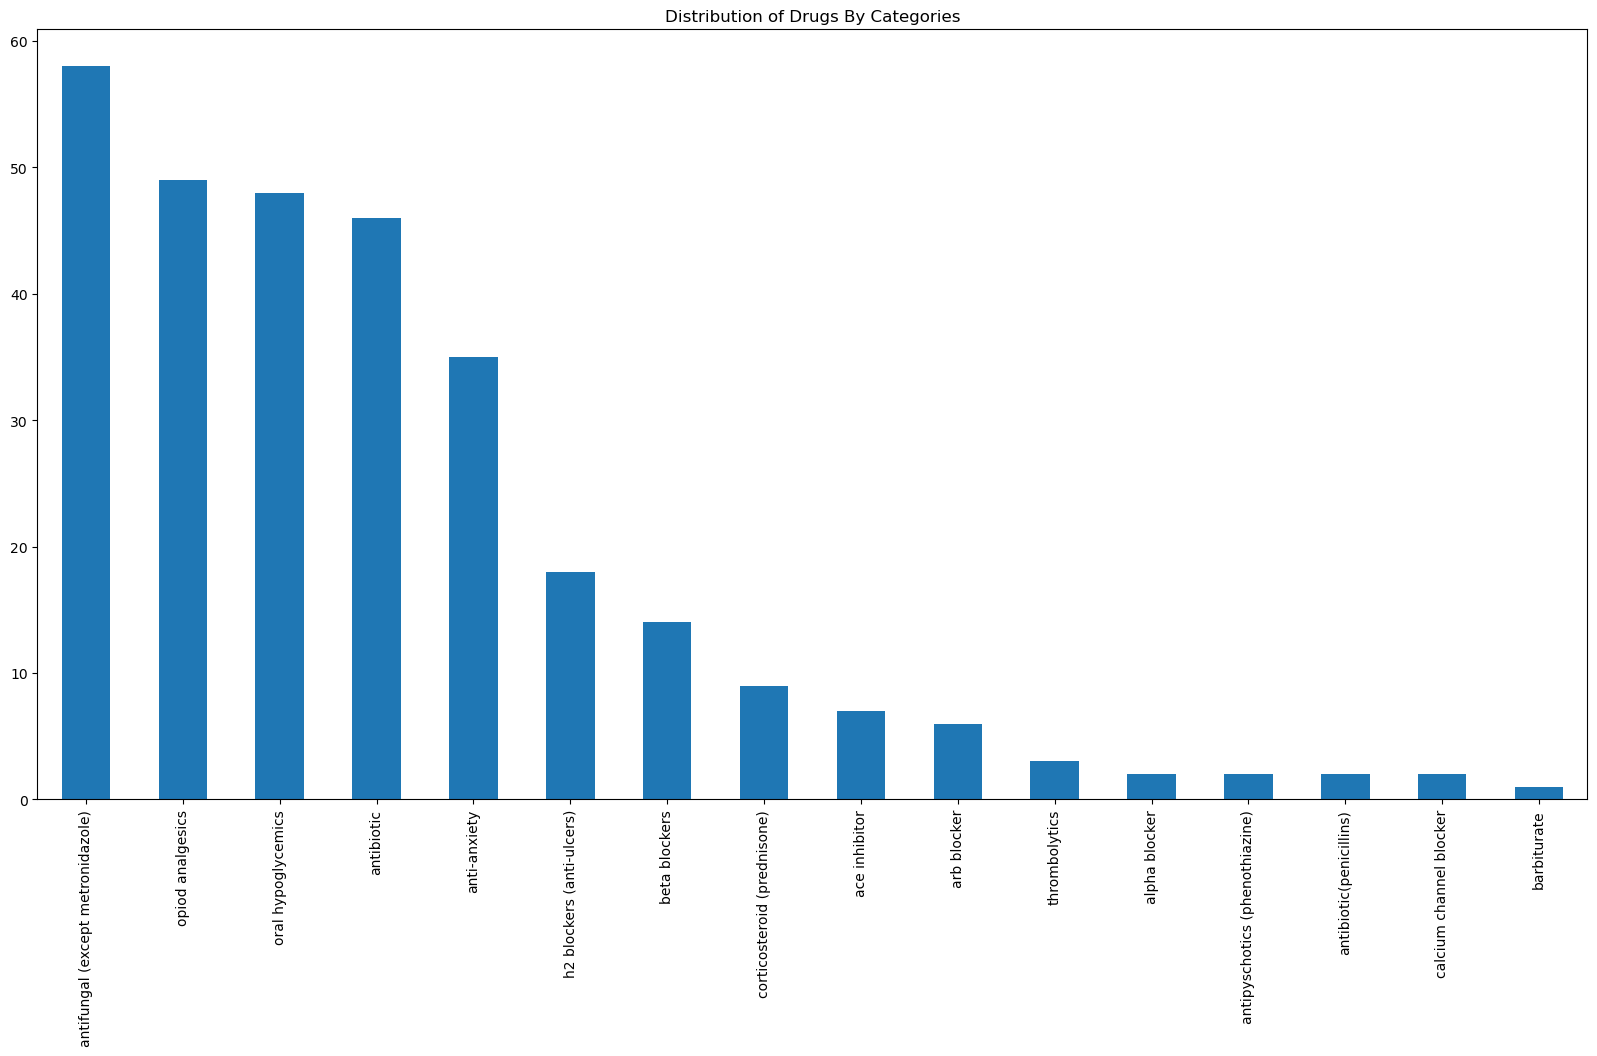

In [26]:
plt.figure(figsize=(20,10))
data_categories['drug_categories'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs By Categories")
plt.show()

In [27]:
drug_groups = data_categories.groupby('drug_categories').size()

In [28]:
drug_groups.to_frame()

,0
drug_categories,
ace inhibitor,7
alpha blocker,2
anti-anxiety,35
antibiotic,46
antibiotic(penicillins),2
antifungal (except metronidazole),58
antipyschotics (phenothiazine),2
arb blocker,6
barbiturate,1


In [29]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

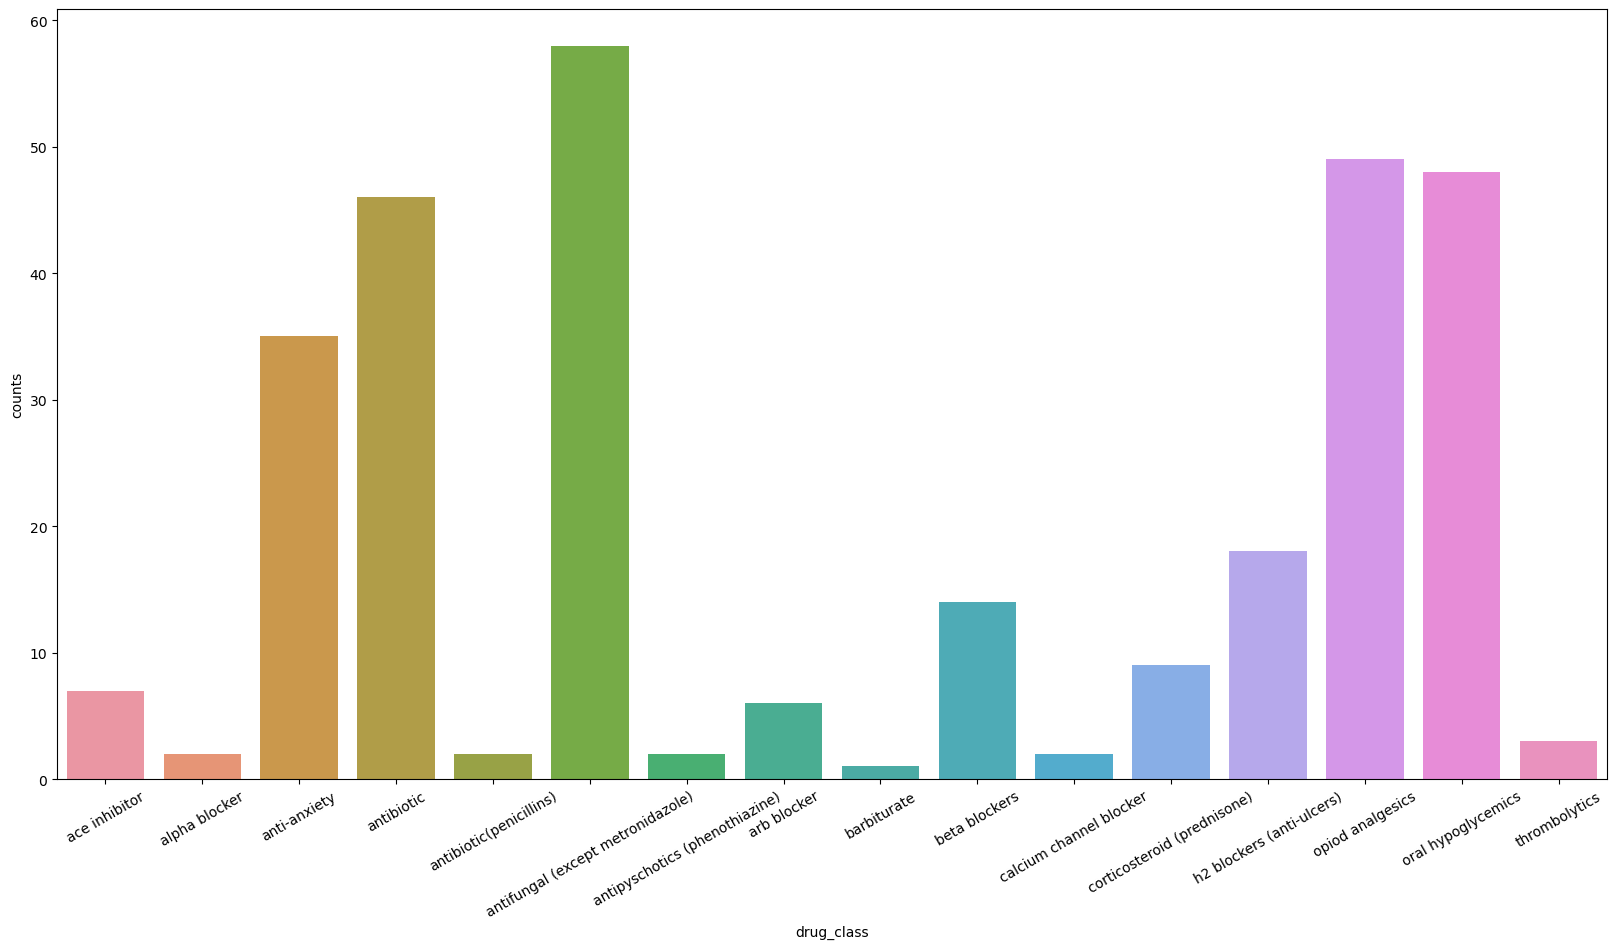

In [30]:
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=30)
plt.show()

<AxesSubplot:>

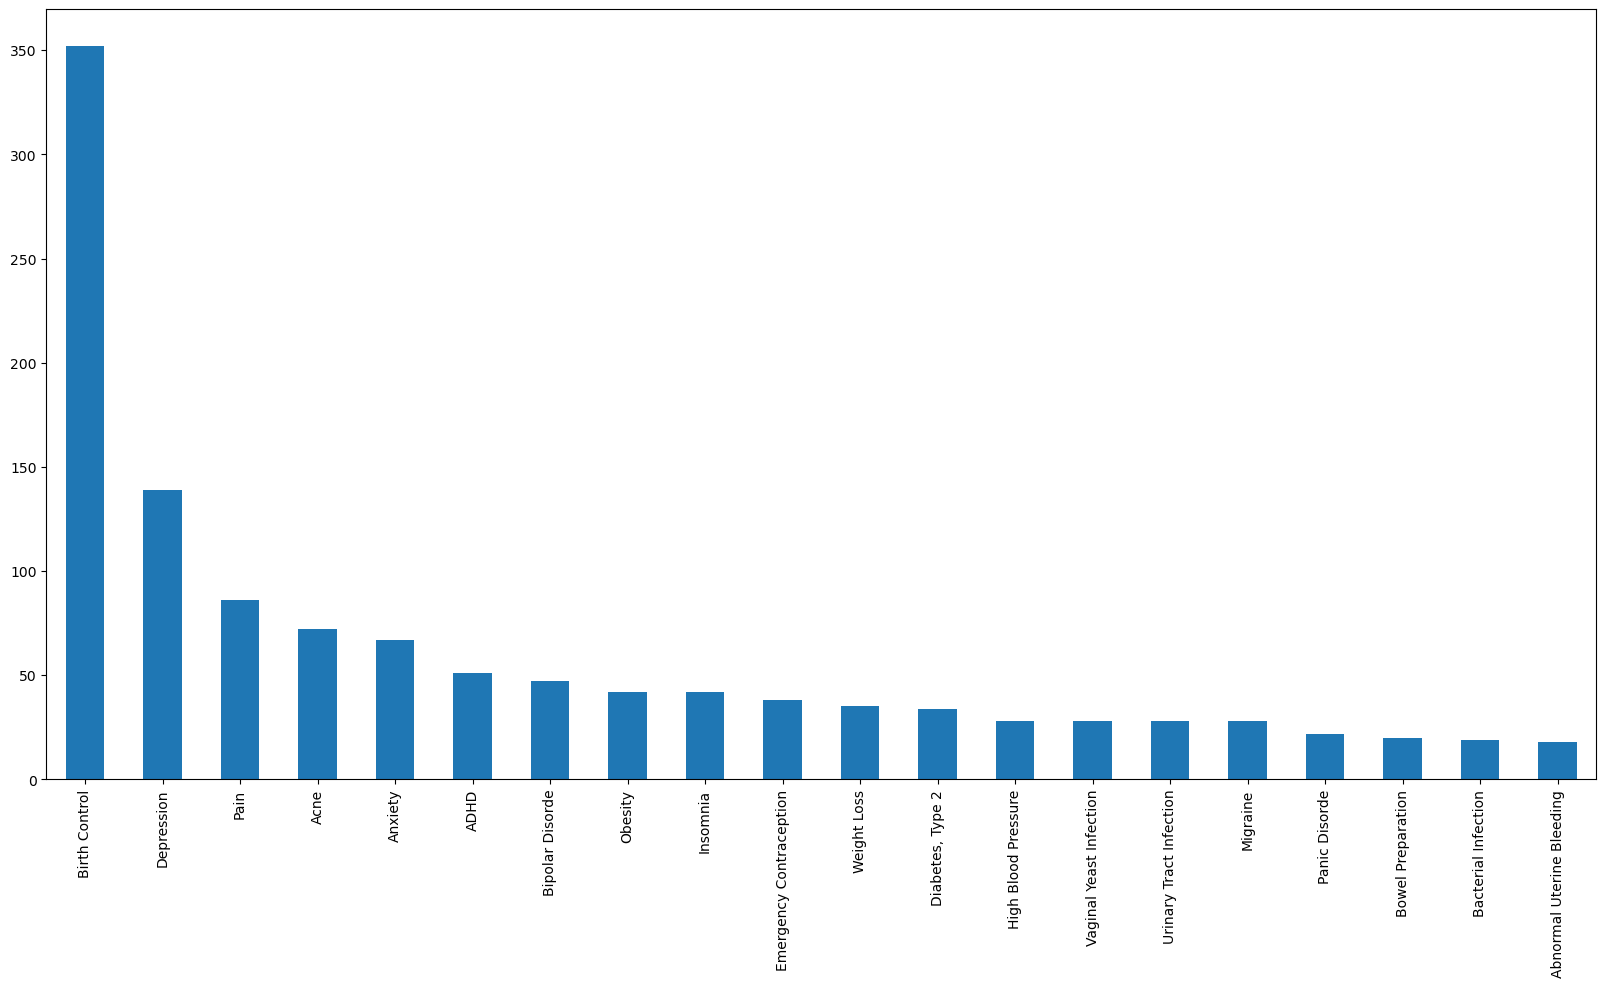

In [31]:
data_df['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

<AxesSubplot:>

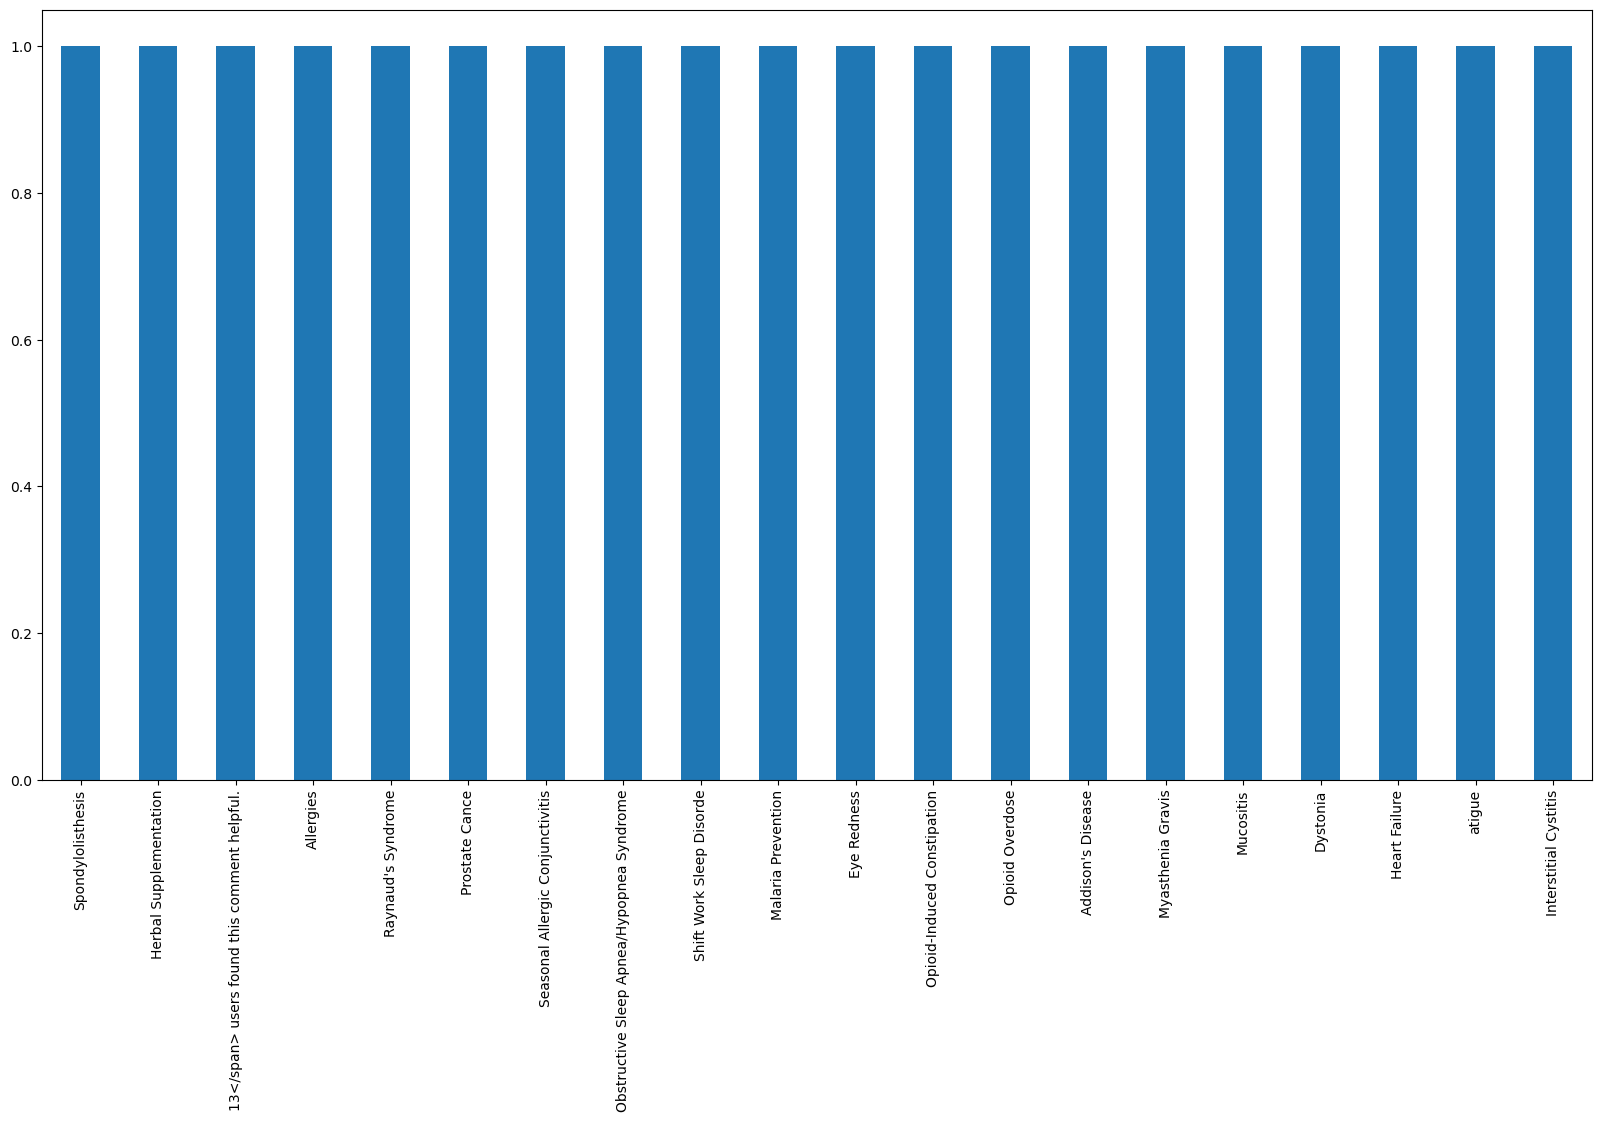

In [32]:
data_df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))

In [33]:
data_df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Birth Control              64
Pain                       46
Depression                 41
Acne                       29
Anxiety                    24
Bipolar Disorde            23
Insomnia                   23
ADHD                       19
Migraine                   18
Diabetes, Type 2           17
High Blood Pressure        17
Bacterial Infection        14
Obesity                    13
ibromyalgia                13
Rheumatoid Arthritis       12
Urinary Tract Infection    12
Overactive Bladde          11
Chronic Pain               10
Osteoarthritis             10
Vaginal Yeast Infection    10
Name: drugName, dtype: int64

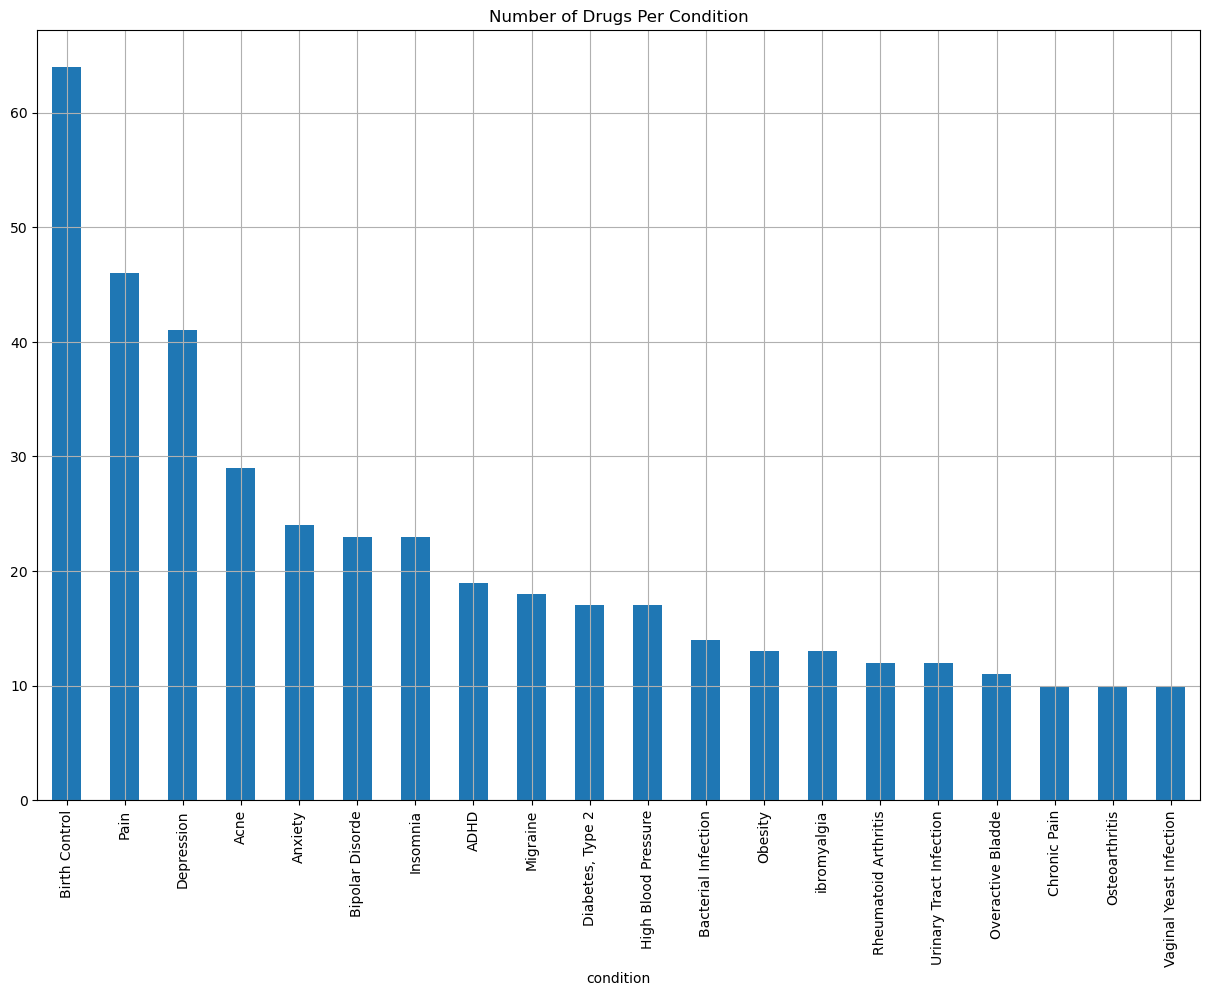

In [34]:
plt.figure(figsize=(15,10))
data_df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()

In [35]:
data_df.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


# Data Cleaning

In [36]:
# We have clean the null values before to the visualization 
data_df.isnull().sum()

uniqueID     0
drugName     0
condition    0
review       0
dtype: int64

In [37]:
data_df.head(5)

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


In [38]:
data_df.drugName.value_counts().head(10)

Etonogestrel                          48
Levonorgestrel                        42
Ethinyl estradiol / norethindrone     29
Ethinyl estradiol / levonorgestrel    26
Ethinyl estradiol / norgestimate      25
Nexplanon                             25
Venlafaxine                           19
Bupropion                             18
Escitalopram                          17
Gabapentin                            16
Name: drugName, dtype: int64

In [39]:
train=data_df[(data_df['drugName']=='Levonorgestrel') | (data_df['drugName']=='Etonogestrel') |  
              (data_df['drugName']=='Ethinyl estradiol / norethindrone') |
              (data_df['drugName']=='Ethinyl estradiol / levonorgestrel')]
          ### The given data is very big so the prediction accuracy will not be perfect
    ## that's why we are going with sample (-TOP 4 DRUG ) Data -

In [40]:
train.head()

,uniqueID,drugName,condition,review
6,165907.0,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t..."
9,48928.0,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m..."
22,227020.0,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free..."
73,144224.0,Etonogestrel,Birth Control,"""My experience during the nexplon is great not..."
82,131041.0,Levonorgestrel,Birth Control,"""I had the Mirena put in almost a year ago. In..."


In [41]:
import nltk 
import re                                    ##  REMOVING OF PUNCTUATIONS
from nltk.corpus import stopwords            ## Removing of Stopwords 
from nltk.stem import PorterStemmer              ## Stemming
ps=PorterStemmer()

In [42]:
corpus=[]
for i in range(len(train)):
    rp=re.sub('[^a-zA-Z]'," ",train["review"].iloc[i])
    rp=rp.lower()
    rp=rp.split()
    rp=[ps.stem(word)for word in rp if not word in stopwords.words("english")]
    rp=" ".join(rp)
    corpus.append(rp)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["drugName"]=le.fit_transform(train["drugName"])

# Data Modelling

In [45]:
y=train["drugName"]
y.head()

6     3
9     0
22    2
73    2
82    3
Name: drugName, dtype: int32

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)                  

In [48]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42)
model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [49]:
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [50]:
from sklearn.metrics import accuracy_score
print("Test:",accuracy_score(y_pred_test,y_test))

Test: 0.6136363636363636


In [51]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score)
print("cross:",score.mean()) 

[0.62068966 0.72413793 0.65517241 0.62068966 0.68965517]
cross: 0.6620689655172414


# Hyperparameter Tuning using GridSearch CV

In [52]:
from sklearn.model_selection import GridSearchCV
estimator=LogisticRegression()
param_grid={"solver":["newton-cg","lbfgs","liblinear","sag","saga"],"penalty":["l1","l2"],"C":[1.0,0.1,0.02,0.4,0.01,0.5,0.6,0.7]}
grid=GridSearchCV(model,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.7, 'penalty': 'l1', 'solver': 'saga'}

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
final_model=LogisticRegression(C=0.7,penalty='l1',solver='saga',random_state=42)
final_model.fit(x_train,y_train)
y_pred_test=final_model.predict(x_test)
y_pred_train=final_model.predict(x_train)
from sklearn.metrics import accuracy_score
print("Test:",accuracy_score(y_pred_test,y_test))

Test: 0.7045454545454546


In [54]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(final_model,x,y,cv=5)
print(score)
print("cross:",score.mean()) 

[0.55172414 0.72413793 0.68965517 0.55172414 0.68965517]
cross: 0.6413793103448276


In [67]:
train['review'].iloc[1]

'"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."'

In [68]:
input_data="I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."

In [69]:
df_test=pd.DataFrame({"review":input_data},index=[0])

In [70]:
corpus=[]
for i in range(len(df_test)):
    rp=re.sub('[^a-zA-Z]'," ",df_test["review"][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[ps.stem(word)for word in rp if not word in stopwords.words("english")]
    rp=" ".join(rp)
    corpus.append(rp)

In [71]:
x=cv.transform(corpus).toarray()

In [72]:
x.shape

(1, 1247)

In [73]:
pred=final_model.predict(x)

In [74]:
for prediction in pred:
    if prediction == 0:
        print("Drug 0")
    elif prediction == 1:
        print("Drug 1")
    elif prediction == 2:
        print("Drug 2")
    elif prediction == 3:
        print("Drug 3")
    else:
        print("Unknown Class")

Drug 0


In [75]:
train.head()

,uniqueID,drugName,condition,review
6,165907.0,3,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t..."
9,48928.0,0,Birth Control,"""I had been on the pill for many years. When m..."
22,227020.0,2,Birth Control,"""Nexplanon does its job. I can have worry free..."
73,144224.0,2,Birth Control,"""My experience during the nexplon is great not..."
82,131041.0,3,Birth Control,"""I had the Mirena put in almost a year ago. In..."


By Analysing the we can say we predicted the correct answer "0" which is drug class "0" ="Ethinyl estradiol / levonorgestrel"

# Saving the Model

In [76]:
from joblib import dump
dump(final_model,"drug_model.joblib")

['drug_model.joblib']